**3. Voting**
---
...

In [10]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [11]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify

In [12]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [13]:
# Reading the dataset and creating the dataframe
voting = loadmat('Datasets.mat/Congretional_voting_Binary_classification.mat')

df = pd.DataFrame(voting.get('X'))
df['y'] = voting.get('y').ravel()

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,1
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
0     423 non-null float64
1     387 non-null float64
2     424 non-null float64
3     424 non-null float64
4     420 non-null float64
5     424 non-null float64
6     421 non-null float64
7     420 non-null float64
8     413 non-null float64
9     428 non-null float64
10    414 non-null float64
11    404 non-null float64
12    410 non-null float64
13    418 non-null float64
14    407 non-null float64
15    331 non-null float64
y     435 non-null uint8
dtypes: float64(16), uint8(1)
memory usage: 54.9 KB


In [18]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000,435.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689,1.613793
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752,0.487440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


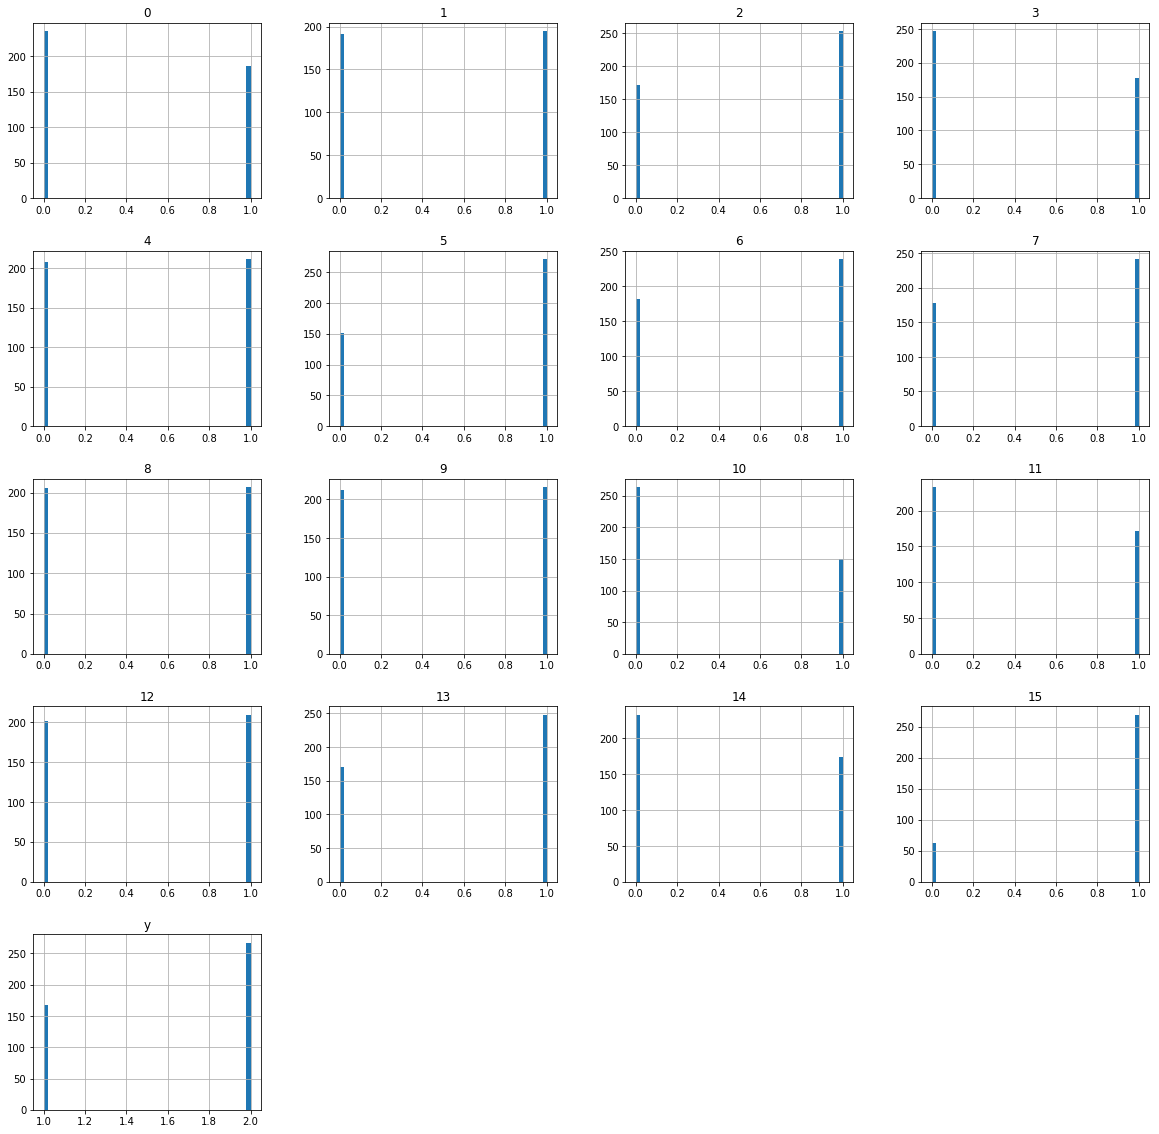

In [19]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

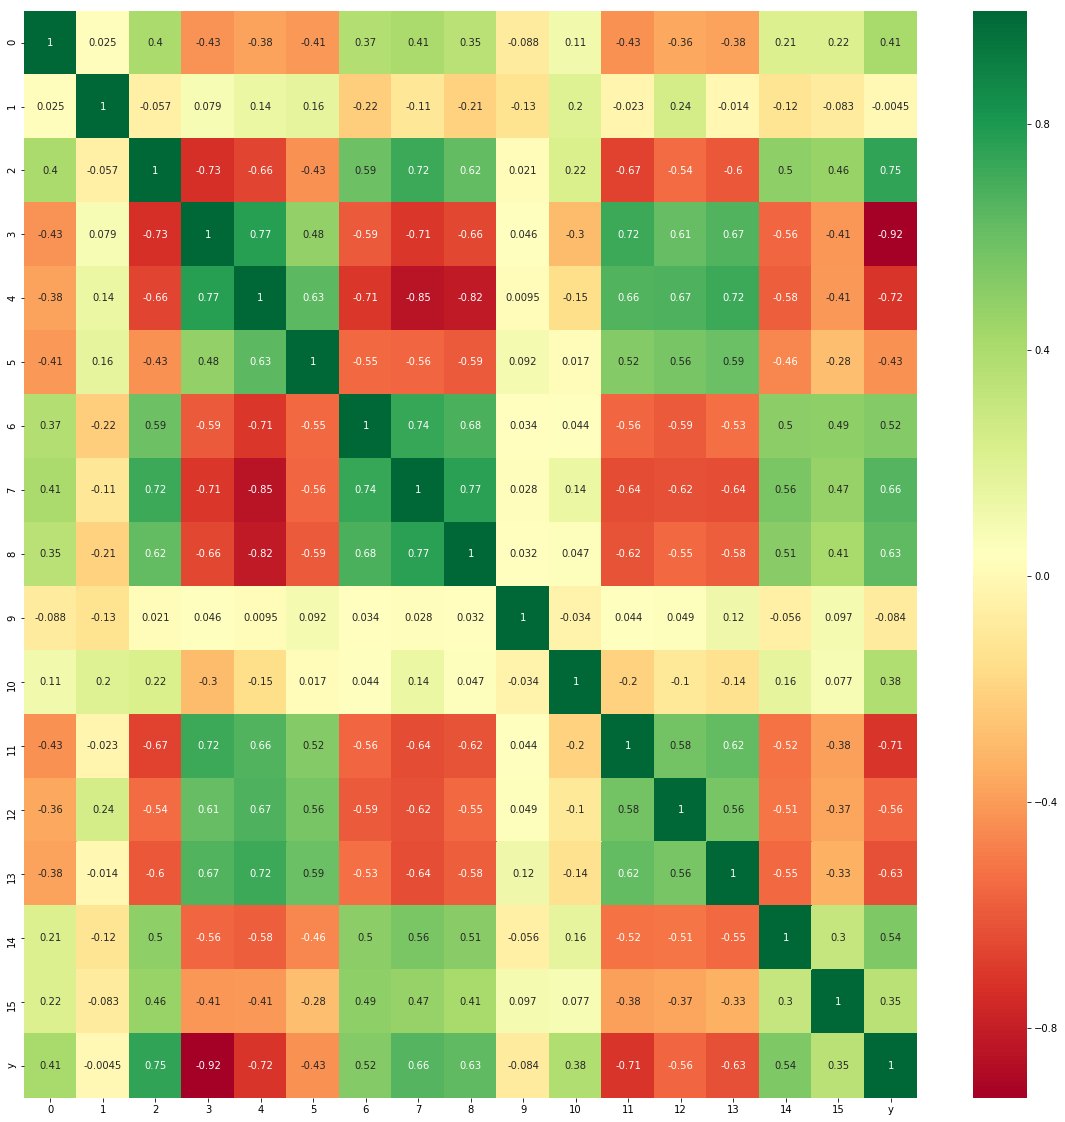

In [20]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [21]:
corrmat['y'].sort_values(ascending=True)

3    -0.923256
4    -0.718769
11   -0.714923
13   -0.625283
12   -0.555971
5    -0.428333
9    -0.083809
1    -0.004534
15    0.353274
10    0.378241
0     0.409330
6     0.521967
14    0.538263
8     0.629798
7     0.661876
2     0.748864
y     1.000000
Name: y, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


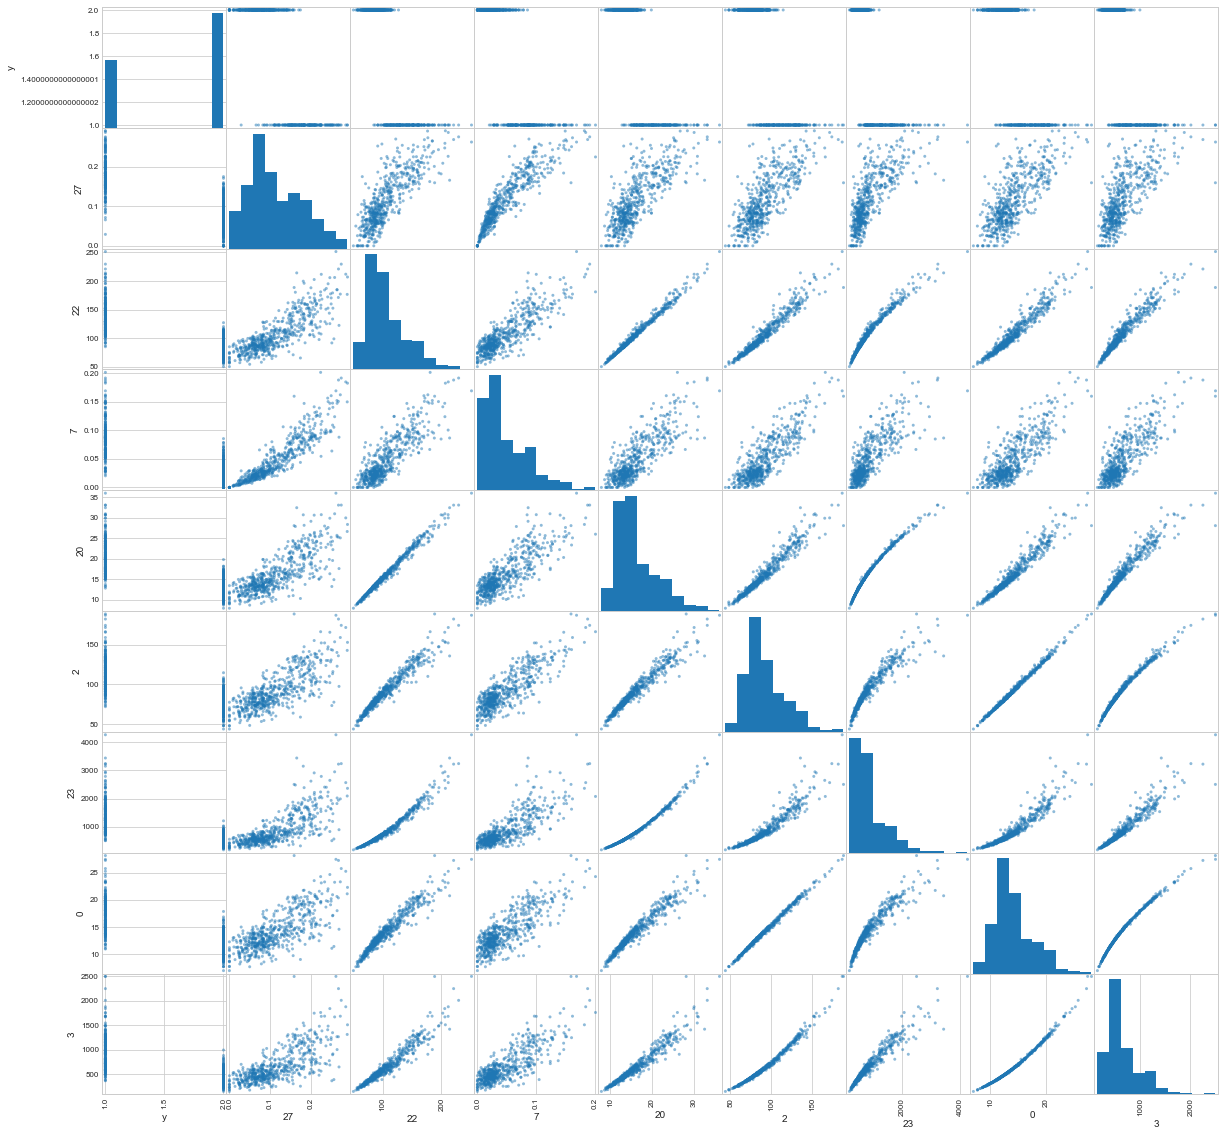

In [39]:
imp_attribs = pd.scatter_matrix(df[['y',27,22, 7,20,2,23,0,3]], figsize=(20,20))

In [44]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2    0.627417
1    0.372583
Name: y, dtype: float64

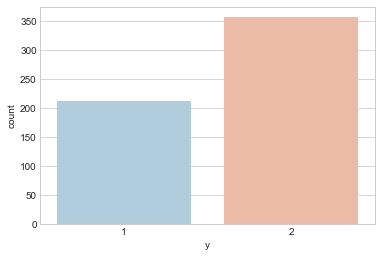

In [21]:
sns.set_style('whitegrid')
balance_check = sns.countplot(x='y',data=df,palette='RdBu_r')

# Preprocessing

In [41]:
212/(212+357)

0.37258347978910367

# 1. Naive Bayes

The model score is 0.939 (+/- 0.030)
The IQR is 0.034 between [0.93,0.96]
There is 0 deleted rows


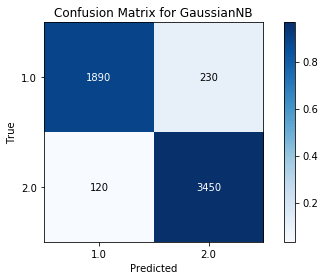

In [18]:
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['Naive Bayes']())

# 2. Logistic Regression

# 3. Ensemble - Random Forests

# 4. Ensemble - AdaBoost

# 5. K-Nearest Neighbours

# 6. Support Vector Machines - Linear Kernel

# 7. Support Vector Machines - RBF Kernel